# TSP Lower Bounds

For a given complete planar graph with vertex set $V$ and weights (distances) $d$, we would like to find the largest possible number $t$ such that $\ell(T) \geq t$ for every TSP tour $T$. We first derive a fairly elementary bound, called the 1-tree bound. Then we expand on the idea, to get sharper Held-Karp bound. See also [link](https://www.sfu.ca/~goddyn/Courses/800/Resources/Algorithms/TSPlowerbounds.pdf).

## 1-tree Bound

The $1$-tree bound for $(V, d)$ is obtained as:
 1.  Pick a node $v_0 \in V$,
 2.  Let $r$ be the length for a minimum spanning tree $T$ on $(V - \{v_0\}, d)$.
 3.  Let $s$ be the sum of the cheapest two edges incident with $v_0$. That is, $s = \min\{d(v_0, x) + d(v_0, y) : x, y \in V - \{v_0\}, x \neq y\}$.
 4.  Output $t = r + s$.

In [ ]:
# This is an implemntation in Sage of the algorithm above
# distsances are edge labels
def one_tree_bound(V, v0):
    """
    Compute the one-tree bound for a given graph with vertex v0.
    """
    pass


### Test the 1-tree Bound

In [2]:
def random_graph(n):
    V = graphs.CompleteGraph(n)
    pos = dict([(i, (100 * random(), 100 * random())) for i in V.vertices()])
    for u, v in V.edges(labels=False):
        V.set_edge_label(u, v, (vector(pos[u]) - vector(pos[v])).norm())
    V.set_pos(pos)
    return V
    

In [172]:
V = random_graph(20)

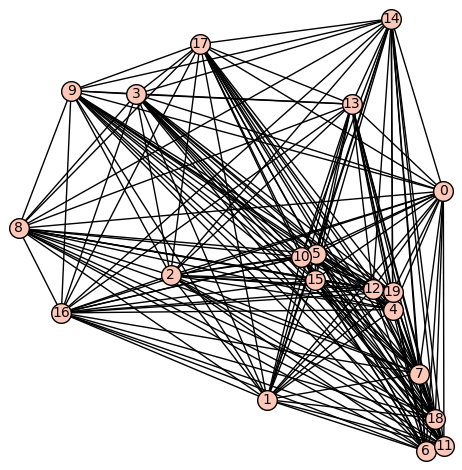

In [173]:
V.plot()

In [222]:
tsp_solution = V.traveling_salesman_problem(use_edge_labels=True)

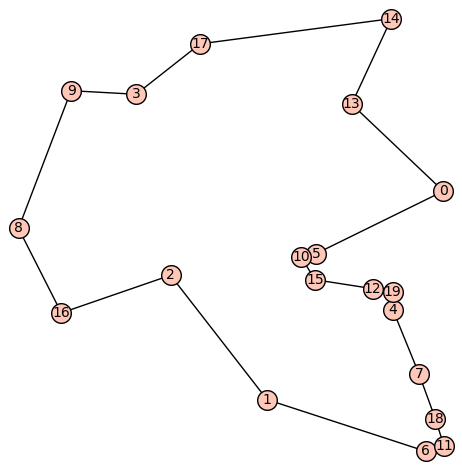

In [224]:
tsp_solution.plot()

In [179]:
tsp_len = sum([d for _, _, d in tsp_solution.edges()])
tsp_len

372.5781013444954

In [180]:
max([one_tree_bound(V, v) for v in V.vertices()])

349.2674887753196

## Held-Karp

Idea behind finding better minimal bound is to "force" the minimum spanning tree (MSP) on $V - \{v_0\}$  to be almost a path (i.e. not having many vertices with degree $> 2$). 
Algorithm:
  1. find a minimal spanning tree $T$.
  2. To each node $v$ with degree > 2 in $T$ assign a node number $y_v = t(2 - d_T(v))$, where $d_T(v)$ is the degree of $v$ in $T$ and we decrease $t$ slowly in the each step of the algorithm.
  3. change the weights of the in edge $(u, v)$ of the graph to $d(v, u) = d(v, u) - y_v - y_u$.
  4. repeat the steps 1 ... 3 $N$ times.
  5. the final (lower) bound for the min spanning tree is $t = \ell(T) + 2 \sum_{v \in {V - \{v_0\}}} y_v$.
 


In [ ]:
def Held_Karp_bound(V, v0, n, t0):
    """
    Compute the Held-Karp bound for a given graph V with vertex v0, number of steps n, and the initial parameter t.
    """
    pass


### Test the Held-Karp bound

In [207]:
max([Held_Karp_bound(V, v, 5, 10.0) for v in V.vertices()])

366.2059285935016

In [217]:
G = Graph([(0, 1, 1), (0, 4, 0), (0, 3, 0), (1, 2, 0), (1, 3, 10), (1, 4, 10), (2, 3, 0), (2, 4, 0), (3, 4, 10)])

In [219]:
Held_Karp_bound(G, 0, 1, 10)

10.0

In [220]:
max([Held_Karp_bound(G, v, 10, 10) for v in G.vertices()])

10.0

In [218]:
max([one_tree_bound(G, v) for v in G.vertices()])

1